In [69]:
import numpy as np
from typing import List
def strategy_kelly_meta(kelly_crit : float):
    def strategy_kelly(bankroll : float, bankroll_history : List):
        # we reserve the existence of previous bankroll here for strategy that involve decision making after previous gain/loss
        return bankroll*kelly_crit
    return strategy_kelly

def strategy_lintang(bankroll : float, bankroll_history : List):
    #if bankroll > 3*10**9:
    #    return bankroll*0.30
    if bankroll > 10*10**9:
        return 10*10**9*0.8
    return bankroll*0.80

def strategy_coward(bankroll : float, bankroll_history : List):
    mentally_unstable_threshold = 100*10**6
    if bankroll > mentally_unstable_threshold:
        #return (1-1/(1+np.exp(-(bankroll/(2*100*10**6)))))*bankroll
        #return np.exp(-bankroll/(100*10**6))**0.5*bankroll*0.8*np.e**0.5
        #return 0.8*mentally_unstable_threshold*np.log(bankroll)/np.log(mentally_unstable_threshold)
        return 0.8*mentally_unstable_threshold*(bankroll/mentally_unstable_threshold)**(0.5)

    return 0.8*bankroll

def strategy_coward_meta(exposed_ratio, mentally_unstable_threshold, decay=0.5):

    def strategy_coward(bankroll : float, bankroll_history : List):
        if bankroll > mentally_unstable_threshold:
            #return (1-1/(1+np.exp(-(bankroll/(2*100*10**6)))))*bankroll
            #return np.exp(-bankroll/(100*10**6))**0.5*bankroll*0.8*np.e**0.5
            #return 0.8*mentally_unstable_threshold*np.log(bankroll)/np.log(mentally_unstable_threshold)
            return exposed_ratio*mentally_unstable_threshold*(bankroll/mentally_unstable_threshold)**(decay)
        return exposed_ratio*bankroll

    return strategy_coward

def strategy_ferry(bankroll, bankroll_history):
    if bankroll>500*10**6:
        return 150*10**6
    return 0.8*bankroll

def simulate_until(init_bankroll, strategy, n_of_games):

    final_bankrolls = []
    def play(bank_roll, n_of_games_left, strategy):
        if n_of_games_left == 0:
            final_bankrolls.append(bank_roll)
            return
        bank_roll_exposed = strategy(bank_roll, bank_roll)
        bank_roll_spare = bank_roll-bank_roll_exposed
        br_win = bank_roll_exposed*3 + bank_roll_spare
        br_lose = bank_roll_exposed*0.7 + bank_roll_spare
        play(br_win, n_of_games_left-1, strategy)
        play(br_lose, n_of_games_left-1, strategy)

    play(init_bankroll, n_of_games, strategy)
    return final_bankrolls

import random
from typing import List
def simulate_with_winning_probs(init_bankroll, strategy, n_of_games, n_of_simulation, probability_of_winning, win_gain=3,lose_gain=0.7):
    final_bankrolls = []
    def play(bank_roll_exposed, bank_roll_spare, n_of_games_left, strategy):
        if n_of_games_left == 0:
            final_bankrolls.append(bank_roll_exposed+bank_roll_spare)
            return

        if random.random() <= probability_of_winning:
            br_next = bank_roll_exposed*win_gain + bank_roll_spare
        else:
            br_next = bank_roll_exposed*lose_gain + bank_roll_spare


        if br_next <= 0:
            final_bankrolls.append(0.0)
            return

        br_next_exposed = strategy(br_next, bank_roll_exposed+bank_roll_spare)
        br_next_spare = br_next - br_next_exposed
        play(br_next_exposed, br_next_spare, n_of_games_left-1, strategy)

    expose = strategy(init_bankroll,init_bankroll)
    spare = init_bankroll-expose
    print(init_bankroll,"=",expose,"+",spare)
    for _ in range(n_of_simulation):
        play(expose,spare, n_of_games, strategy)
        #play(expose,spare, n_of_games_to_play, strategy)
    return final_bankrolls

def simulate_with_generators(init_bankroll, strategy, n_of_games_rng, n_of_simulation, gain_rng, deposit_algorithm):
    final_bankrolls = []

    def play(bank_roll_exposed, bank_roll_spare, n_of_games_left, strategy, bank_roll_history : List):
        if n_of_games_left == 0:
            final_bankrolls.append(bank_roll_exposed+bank_roll_spare)
            return

        br_next = bank_roll_exposed*gain_rng() + bank_roll_spare


        if br_next <= 0:
            final_bankrolls.append(0.0)
            return
        
        br_next += deposit_algorithm(bank_roll_history)

        br_next_exposed = strategy(br_next, bank_roll_history)
        br_next_spare = br_next - br_next_exposed

        bank_roll_history_copy = bank_roll_history.copy()
        bank_roll_history_copy.append(br_next)
        play(br_next_exposed, br_next_spare, n_of_games_left-1, strategy, bank_roll_history_copy)

    expose = strategy(init_bankroll,[])
    spare = init_bankroll-expose
    #if not (override_spare is None):
    #    spare = override_spare

    for _ in range(n_of_simulation):
        play(expose,spare, n_of_games_rng(), strategy, [init_bankroll])

    return final_bankrolls

final_bankrolls = simulate_until(10000000.0,strategy_kelly_meta(0.8),7)

In [2]:
import numpy as np
val, counts = np.unique(final_bankrolls,return_counts=True)

In [3]:
broll= 10**14
strategy_coward(broll,0)

80000000000.0

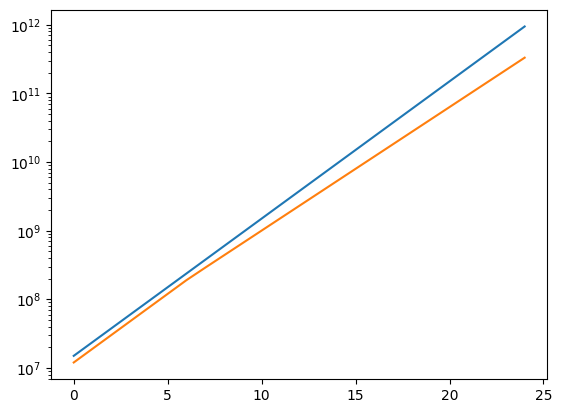

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
porto = []
exposed = []
ratio_exposed = []
strat_cow = strategy_coward_meta(0.8,2.5*10**8,0.9)
for i in np.arange(6,11,0.2):
    porto_size = 15*10**i
    porto.append(porto_size)
    exposed.append(strat_cow(porto_size,porto_size))
    ratio_exposed.append(exposed[-1]/porto_size)
    pass

plt.plot(porto)
plt.plot(exposed)
plt.yscale('log')

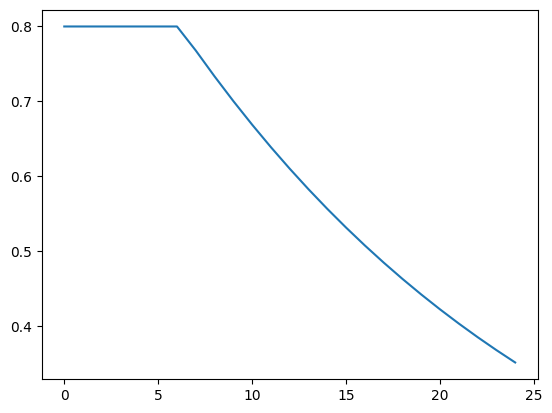

In [5]:
plt.plot(ratio_exposed)

<BarContainer object of 17 artists>

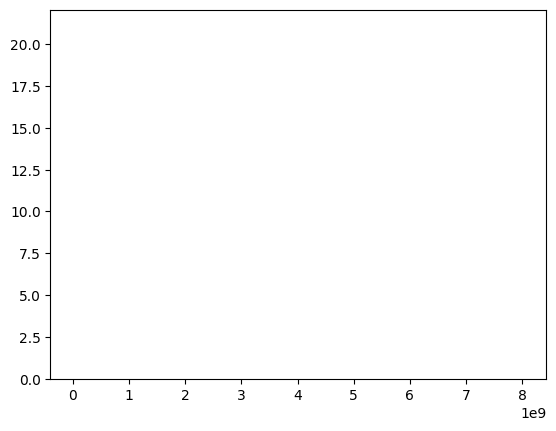

In [6]:
import matplotlib.pyplot as plt


#plt.hist(final_bankrolls,)
plt.bar(val,counts)
#plt.xscale('log')
#plt.yscale('log')

In [7]:
val, counts

(array([1.46451946e+06, 5.01019814e+06, 5.01019814e+06, 1.71401515e+07,
        1.71401515e+07, 1.71401515e+07, 5.86373605e+07, 5.86373605e+07,
        5.86373605e+07, 5.86373605e+07, 2.00601497e+08, 2.00601497e+08,
        2.00601497e+08, 6.86268278e+08, 6.86268278e+08, 2.34775990e+09,
        8.03181018e+09]),
 array([ 1,  1,  6,  1, 15,  5,  6, 16,  9,  4, 21, 10,  4, 11, 10,  7,  1]))

In [8]:
counts.sum()

np.int64(128)

In [9]:
for v,c in zip(val,counts):
    print(int(v),c/128)

1464519 0.0078125
5010198 0.0078125
5010198 0.046875
17140151 0.0078125
17140151 0.1171875
17140151 0.0390625
58637360 0.046875
58637360 0.125
58637360 0.0703125
58637360 0.03125
200601496 0.1640625
200601496 0.078125
200601496 0.03125
686268277 0.0859375
686268277 0.078125
2347759897 0.0546875
8031810176 0.0078125


1.8666666666666667
1000000 = 800000.0 + 200000.0


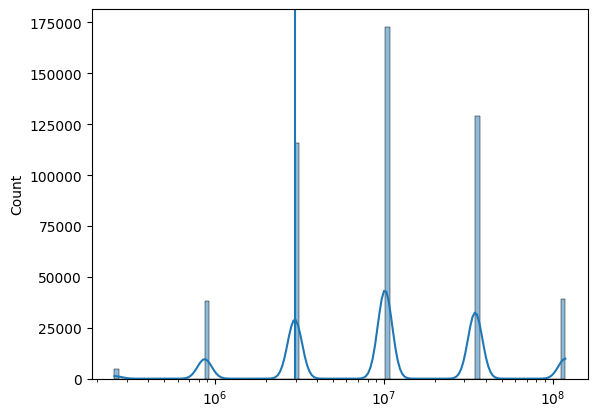

In [62]:
import seaborn as sns
probability_of_win = 0.60
probability_of_lose = 1-probability_of_win
gain_win = 3.0
gain_lose = 0.3
kelly_c = probability_of_win/gain_lose - probability_of_lose/gain_win
print(kelly_c)
initial_bankroll = 1*10**6
number_of_simulation = 500000
final_bankrolls_with_probs = simulate_with_winning_probs(initial_bankroll,
                                                         #strategy_kelly_meta(0.8),
                                                         #strategy_lintang,
                                                         #strategy_coward_meta(0.8,3.0*10**8,0.9),
                                                         strategy_ferry,
                                                         5,
                                                         number_of_simulation,
                                                         probability_of_win, 
                                                         gain_win,
                                                         1-gain_lose)
vals, counts = np.unique(final_bankrolls_with_probs,return_counts=True)
#print(vals,counts)
#sns.kdeplot(x=vals,y=counts/1000,)
sns.histplot(final_bankrolls_with_probs,kde=True,log_scale=(True,False))
ten_percent = np.percentile(final_bankrolls_with_probs,10)
plt.axvline(ten_percent,0,10000)

In [100]:
np.percentile(final_bankrolls_with_probs,10)

226170213.48459917

In [83]:
0.7**5*500

84.03499999999997

In [211]:
3**10*500*10**6

29524500000000

In [13]:
total_below_1 = 0
for v,c in zip(vals,counts):
    if v<=initial_bankroll:
        total_below_1 += c

print(total_below_1/number_of_simulation)

0.086484


In [14]:

total_below_10percent = 0
for v,c in zip(vals,counts):
    if v<=initial_bankroll:
        total_below_1 += c


In [15]:
81*5*10**8

40500000000

lets create a "gain" distribution that has 40% chance to be below 1



In [19]:
from scipy.stats import norm

In [63]:
import seaborn as sns
probability_of_win = 0.75
probability_of_lose = 1-probability_of_win
gain_win = 3.0
gain_lose = 0.3
kelly_c = probability_of_win/gain_lose - probability_of_lose/gain_win
print(kelly_c)

def gain_generator():
    if random.random() <= probability_of_win:
        return 1+(gain_win-1)*random.random() # 1.0 min 3.0 max
    return 1-(gain_lose)*random.random() #0.7 min 1.0 max

def gain_generator_bimodal():
    win_distribution_gain = norm.rvs(2,0.1,1)[0]
    lose_distribution_gain = norm.rvs(0.7,0.1,1)[0]
    #return win_distribution_gain*probability_of_win + lose_distribution_gain*probability_of_lose
    if random.random()<probability_of_win:
        return win_distribution_gain
    return lose_distribution_gain
    pass

def narative_count_generator():
    #return 5
    return 3+int(random.random()*5) # min 3 max 7 narasi


2.4166666666666665


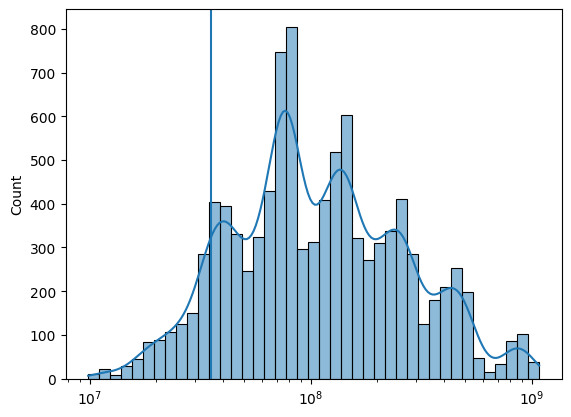

In [76]:
initial_bankroll = 10*10**6
number_of_simulation = 10000

def deposit_algo_elsa(bankroll_history):
     return 1*10**6
def deposit_algo_ajeng(bankroll_history):
     if len(bankroll_history) == 1:
          return 3*10**6
     if len(bankroll_history) == 2:
          return 5*10**6*0.8
     return 3*10**6

final_bankrolls_with_probs = simulate_with_generators(initial_bankroll,
                                                         strategy_kelly_meta(0.8),
                                                         #strategy_lintang,
                                                         #strategy_coward_meta(0.8,3.0*10**8,0.9),
                                                         #strategy_ferry,
                                                         #strategy_ajeng_DCA,
                                                         narative_count_generator,
                                                         number_of_simulation,
                                                         gain_generator_bimodal,
                                                         deposit_algo_ajeng
                                                    )
vals, counts = np.unique(final_bankrolls_with_probs,return_counts=True)
#print(vals,counts)
#sns.kdeplot(x=vals,y=counts/1000,)
sns.histplot(final_bankrolls_with_probs,kde=True,log_scale=(True,False))
ten_percent = np.percentile(final_bankrolls_with_probs,10)
plt.axvline(ten_percent,0,10000)

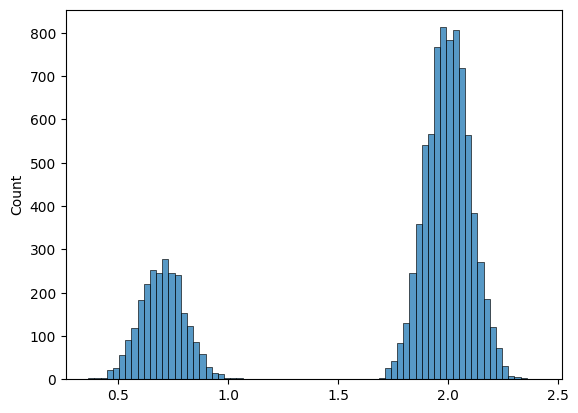

In [52]:
test = []
for i in range(10000):
    test.append(gain_generator_bimodal())
sns.histplot(test)
plt.xscale('linear')